<a href="https://www.kaggle.com/code/amirmotefaker/coronavirus-pandemic-covid-19-visualization?scriptVersionId=115487523" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Coronavirus Pandemic (COVID-19)

- Coronavirus disease (COVID-19) is an infectious disease caused by the SARS-CoV-2 virus.
- Most people who fall sick with COVID-19 will experience mild to moderate symptoms and recover without special treatment. However, some will become seriously ill and require medical attention.

Learn more about Coronavirus disease (COVID-19) pandemic: [WHO](https://www.who.int/emergencies/diseases/novel-coronavirus-2019)

COVID Live - Coronavirus Statistics: [Worldometers](https://www.worldometers.info/coronavirus/)

COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University: [Data](https://github.com/CSSEGISandData/COVID-19)


# Import Libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time

from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

import datetime
import operator  # exports a set of efficient functions corresponding to the intrinsic operators of Python
plt.style.use('seaborn-poster')

%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`


## Import the data (make sure you update this on a daily basis)

In [2]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/09-09-2022.csv')
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/09-09-2022.csv')

In [3]:
latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2022-09-10 04:21:10,33.93911,67.709953,195471,7786,NaN,NaN,Afghanistan,502.130312,3.983200
1,NaN,NaN,NaN,Albania,2022-09-10 04:21:10,41.15330,20.168300,330842,3584,NaN,NaN,Albania,11496.351380,1.083297
2,NaN,NaN,NaN,Algeria,2022-09-10 04:21:10,28.03390,1.659600,270522,6879,NaN,NaN,Algeria,616.911210,2.542862
3,NaN,NaN,NaN,Andorra,2022-09-10 04:21:10,42.50630,1.521800,46113,155,NaN,NaN,Andorra,59681.615220,0.336131
4,NaN,NaN,NaN,Angola,2022-09-10 04:21:10,-11.20270,17.873900,103131,1917,NaN,NaN,Angola,313.789810,1.858801


In [4]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23,1/3/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,207399,207438,207460,207493,207511,207550,207559,207616,207627,207654
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,333749,333751,333751,333776,333776,333806,333806,333811,333812,333812
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271198,271198,271202,271208,271217,271223,271228,271229,271229,271230
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47686,47686,47686,47751,47751,47751,47751,47751,47751,47751
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,104973,104973,105095,105095,105095,105095,105095,105095,105095,105095


In [5]:
us_medical_data.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,Date,People_Tested,Mortality_Rate
0,Alabama,US,2022-09-10 04:33:21,32.3182,-86.9023,1504180,20239,NaN,NaN,1.0,...,NaN,NaN,1.345517,84000001.0,USA,NaN,NaN,2022-09-09,NaN,NaN
1,Alaska,US,2022-09-10 04:33:21,61.3707,-152.4044,295596,1338,NaN,NaN,2.0,...,NaN,NaN,0.452645,84000002.0,USA,NaN,NaN,2022-09-09,NaN,NaN
2,American Samoa,US,2022-09-10 04:33:21,-14.2710,-170.1320,8217,34,NaN,NaN,60.0,...,NaN,NaN,0.413776,16.0,ASM,NaN,NaN,2022-09-09,NaN,NaN
3,Arizona,US,2022-09-10 04:33:21,33.7298,-111.4312,2258040,31162,NaN,NaN,4.0,...,20720327.0,NaN,1.380046,84000004.0,USA,284670.045559,NaN,2022-09-09,NaN,NaN
4,Arkansas,US,2022-09-10 04:33:21,34.9697,-92.3731,940689,11953,NaN,NaN,5.0,...,5477770.0,NaN,1.270664,84000005.0,USA,181515.101710,NaN,2022-09-09,NaN,NaN


In [6]:
confirmed_cols = confirmed_df.keys()
deaths_cols = deaths_df.keys()

## Get all the dates for the ongoing coronavirus pandemic

In [7]:
confirmed = confirmed_df.loc[:, confirmed_cols[4]:]
deaths = deaths_df.loc[:, deaths_cols[4]:]

In [8]:
confirmed.keys()

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '12/25/22', '12/26/22', '12/27/22', '12/28/22', '12/29/22', '12/30/22',
       '12/31/22', '1/1/23', '1/2/23', '1/3/23'],
      dtype='object', length=1078)

In [9]:
num_dates = len(confirmed.keys())
ck = confirmed.keys()
dk = deaths.keys()

world_cases = []
total_deaths = [] 
mortality_rate = []


for i in range(num_dates):
    confirmed_sum = confirmed[ck[i]].sum()
    death_sum = deaths[dk[i]].sum()
    
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)

## Getting daily increases and moving averages

In [10]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average

# window size
window = 7

# confirmed cases
world_daily_increase = daily_increase(world_cases)
world_confirmed_avg= moving_average(world_cases, window)
world_daily_increase_avg = moving_average(world_daily_increase, window)

# deaths
world_daily_death = daily_increase(total_deaths)
world_death_avg = moving_average(total_deaths, window)
world_daily_death_avg = moving_average(world_daily_death, window)

In [11]:
days_since_1_22 = np.array([i for i in range(len(ck))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)

## Future forcasting

In [12]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(ck)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

## Convert integer into datetime for better visualization

In [13]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

## We are using data from 8/1/2022 to present for the prediction model

In [14]:
# slightly modify the data to fit the model better (regression models cannot pick the pattern), 
# we are using data from 8/1/22 and onwards for the prediction modeling 
days_to_skip = 922
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22[days_to_skip:], world_cases[days_to_skip:], test_size=0.07, shuffle=False) 

## Support Vector Machine(SVM)

In [15]:
# # use this to find the optimal parameters for SVR(Support Vector Regression)
# c = [0.01, 0.1, 1]
# gamma = [0.01, 0.1, 1]
# epsilon = [0.01, 0.1, 1]
# shrinking = [True, False]

# svm_grid = {'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}

# svm = SVR(kernel='poly', degree=3)
# svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
# svm_search.fit(X_train_confirmed, y_train_confirmed)

In [16]:
# svm_search.best_params_

In [17]:
# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

MAE: 463374.5727720044
MSE: 248865527028.926


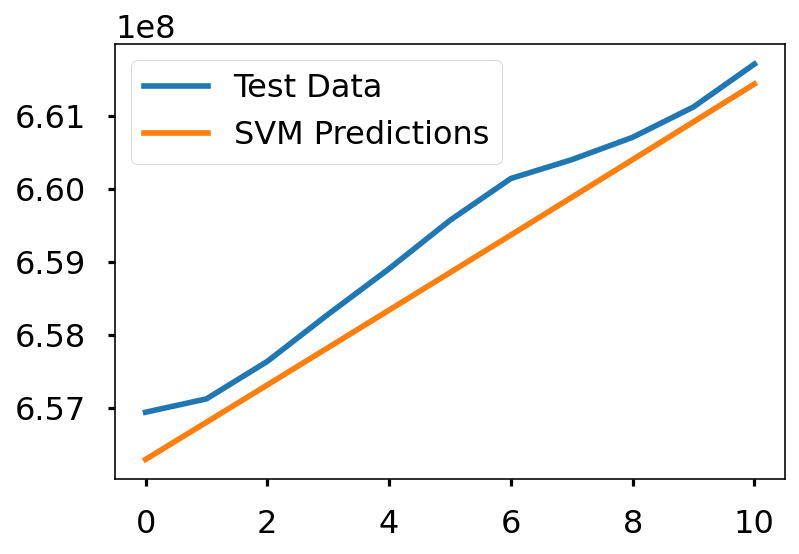

In [18]:
# check against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

In [19]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=3)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly = PolynomialFeatures(degree=3)
bayesian_poly_X_train_confirmed = bayesian_poly.fit_transform(X_train_confirmed)
bayesian_poly_X_test_confirmed = bayesian_poly.fit_transform(X_test_confirmed)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)

## Polynomial Regression

In [20]:
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 1556559.9910084119
MSE: 3019863467326.1675


In [21]:
print(linear_model.coef_)

[[-2.72161221e+10  8.22329524e+07 -8.13271942e+04  2.69359972e+01]]


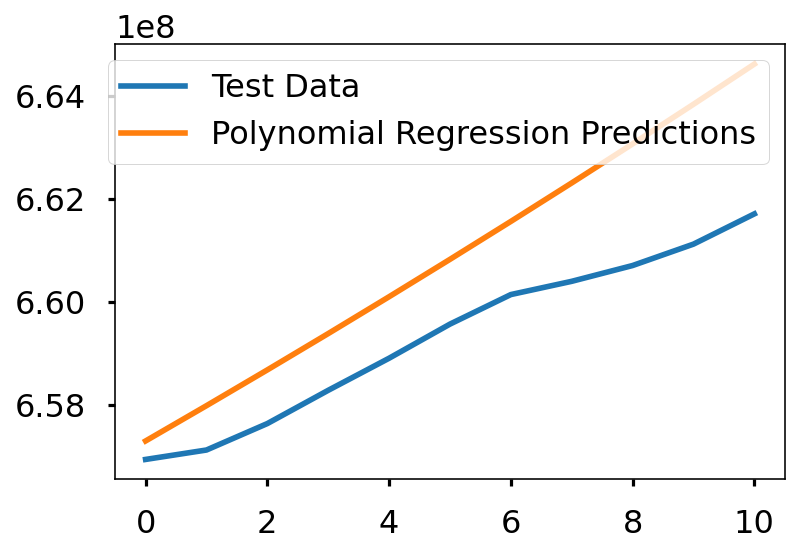

In [22]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

## Bayesian Ridge Polynomial Regression

In [23]:
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(bayesian_poly_X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pip

RandomizedSearchCV(cv=3, estimator=BayesianRidge(fit_intercept=False),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001],
                                        'lambda_2': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001],
                                        'normalize': [True, False],
                                        'tol': [1e-06, 1e-05, 0.0001, 0.001,
                                                0.01]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [24]:
bayesian_search.best_params_

{'tol': 0.001,
 'normalize': True,
 'lambda_2': 0.001,
 'lambda_1': 1e-05,
 'alpha_2': 1e-06,
 'alpha_1': 0.001}

In [25]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(bayesian_poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(bayesian_poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))

MAE: 107151645.20577626
MSE: 1.150872266187732e+16


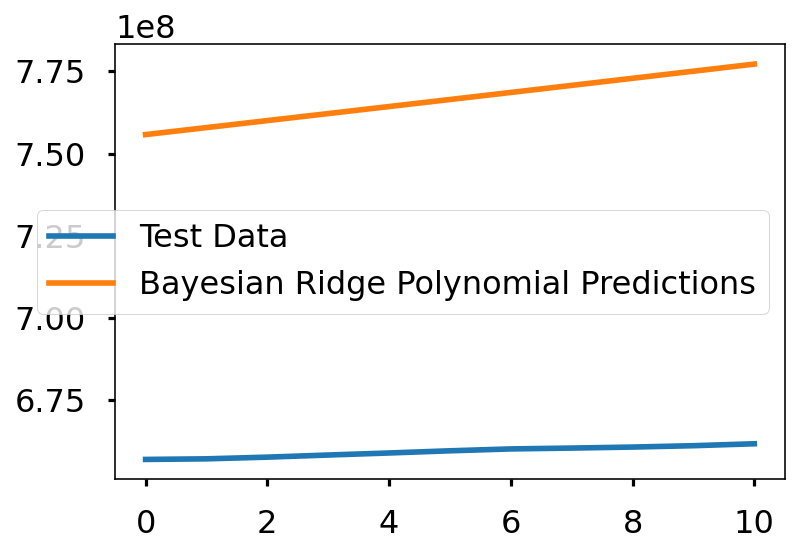

In [26]:
plt.plot(y_test_confirmed)
plt.plot(test_bayesian_pred)
plt.legend(['Test Data', 'Bayesian Ridge Polynomial Predictions'])